<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%203/Modulo_3_Ejercicio_6_PCA_3_Componentes_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 6: Reducción de Dimensionalidad con PCA para Análisis de Calidad**
#### Aplicación de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad en control de calidad

### **Introducción**
En este ejercicio, aplicaremos Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos de control de calidad en empaques de alimentos. El objetivo es mantener la mayor cantidad de información relevante mientras se reduce el número de variables, facilitando el análisis y mejorando la eficiencia de los modelos de clasificación.

In [ ]:
# Celda 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset "Control de calidad en empaques de alimentos", que contiene información sobre las propiedades físicas de los envases y su calidad. Este conjunto de datos es ideal para aplicar PCA, ya que permite analizar la reducción de dimensionalidad sin perder información crítica sobre los defectos detectados en los empaques.

In [ ]:
# Celda 2
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_empaques.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado,Proveedor_material,Tipo_envase,Color_material,Defecto_detectado
0,1,52.483571,0.251530,131.236814,166.001783,8.035426,Proveedor_7,Envase_4,Azul,Rasgado
1,2,49.308678,0.142232,98.115434,185.478228,4.851902,Proveedor_4,Envase_1,Transparente,Rasgado
2,3,53.238443,0.228772,141.912131,178.792377,4.524469,Proveedor_6,Envase_1,Azul,Rasgado
3,4,57.615149,0.169038,72.227237,177.167362,5.515039,Proveedor_4,Envase_2,Blanco,Doble capa
4,5,48.829233,0.183630,93.146984,187.675692,4.936259,Proveedor_9,Envase_4,Azul,Sin defecto


In [ ]:
# Celda 3
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_envase            100000 non-null  int64  
 1   Peso_envase          100000 non-null  float64
 2   Espesor_material     100000 non-null  float64
 3   Dureza_superficie    100000 non-null  float64
 4   Temperatura_sellado  100000 non-null  float64
 5   Tiempo_prensado      100000 non-null  float64
 6   Proveedor_material   100000 non-null  object 
 7   Tipo_envase          100000 non-null  object 
 8   Color_material       100000 non-null  object 
 9   Defecto_detectado    100000 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.6+ MB


In [ ]:
# Celda 4
# Resumen estadístico
data.describe()

,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,50.004834,0.200049,103.679283,179.998710,4.979961
std,28867.657797,5.004530,0.049947,30.734946,10.015942,1.048895
min,1.000000,27.671981,-0.018702,11.722281,136.870271,0.170564
25%,25000.750000,46.627531,0.166316,86.973403,173.208950,4.292523
50%,50000.500000,50.013248,0.200025,100.745861,180.025946,4.985470
75%,75000.250000,53.384573,0.233745,114.969594,186.726614,5.675182
max,100000.000000,72.395421,0.428106,474.476149,219.181850,13.090245


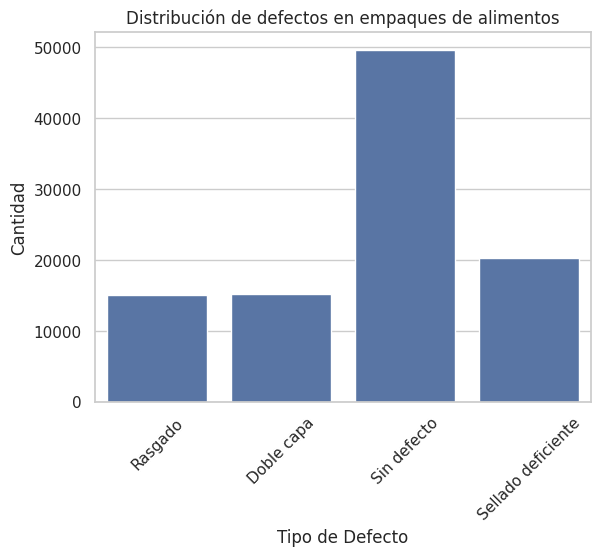

In [ ]:
# Celda 5
# Distribución de la variable objetivo 'Defecto_detectado'
sns.countplot(x='Defecto_detectado', data=data)
plt.title('Distribución de defectos en empaques de alimentos')
plt.xlabel('Tipo de Defecto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### **Preprocesamiento de los datos**
Se seleccionan las variables numéricas y se normalizan antes de aplicar PCA.

In [ ]:
# Celda 6
# Seleccionar solo las variables numéricas para PCA
numeric_columns = ['Peso_envase', 'Espesor_material', 'Dureza_superficie', 'Temperatura_sellado', 'Tiempo_prensado']
X = data[numeric_columns]

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar la transformación
pd.DataFrame(X_scaled, columns=numeric_columns).head()

,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado
0,0.495301,1.030712,0.896623,-1.397472,2.913047
1,-0.139106,-1.157569,-0.181028,0.547082,-0.122091
2,0.646140,0.575069,1.243960,-0.120442,-0.434262
3,1.520693,-0.620881,-1.023337,-0.282685,0.510138
4,-0.234909,-0.328734,-0.342683,0.766480,-0.041665


### **Aplicación de PCA**
Se aplica PCA para reducir la dimensionalidad del dataset y se analiza la varianza explicada.

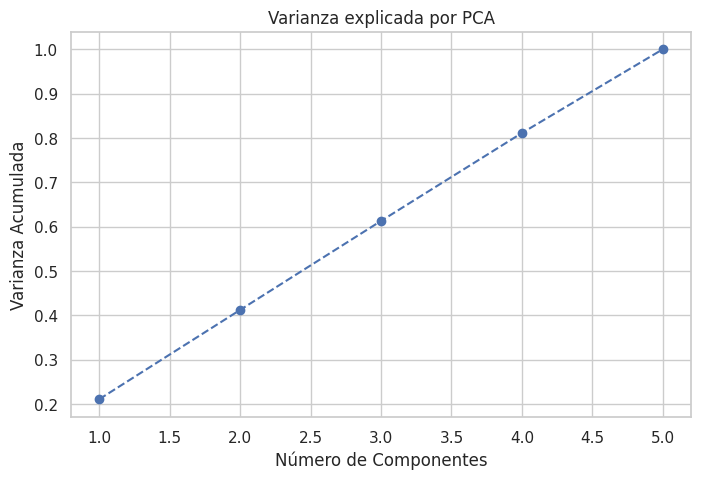

In [ ]:
# Celda 7
# Aplicar PCA con 5 componentes
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Visualizar la varianza explicada
plt.figure(figsize=(8,5))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='dashed')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza explicada por PCA')
plt.show()

### **Comparación del modelo de clasificación antes y después de PCA**
Se entrena un modelo de clasificación antes y después de aplicar PCA, utilizando solo los 3 primeros componentes.

A fin de testear cuánto influye PCA en la capacidad predictora del modelo, calcularemos el accuracy de ambos modelos, aunque forma parte del temario del Módulo 4.

In [ ]:
# Celda 8
# Preparar la variable objetivo
y = data['Defecto_detectado']

# Seleccionar solo los 3 primeros componentes de PCA, ya que con ellos explicamos el 60% de la varianza
# y nos permiten reducir un 40% el numero de parámetros, y por tanto la carga computacional.
X_pca_3 = X_pca[:, :3]

# Dividir datos originales en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Dividir datos transformados por PCA en entrenamiento y prueba
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_3, y, test_size=0.2, random_state=42, stratify=y)

# Modelo de clasificación sin PCA
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Modelo de clasificación con PCA (3 componentes principales)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f'Precisión del modelo sin PCA: {accuracy_original:.2f}')
print(f'Precisión del modelo con PCA (3 componentes): {accuracy_pca:.2f}')

Precisión del modelo sin PCA: 0.48
Precisión del modelo con PCA (3 componentes): 0.45


### **Conclusiones**
En este ejercicio, aplicamos PCA para reducir la dimensionalidad del dataset de control de calidad en empaques de alimentos. Se analizó la varianza explicada por cada componente y se comparó el desempeño de un modelo de clasificación antes y después de la reducción de dimensionalidad.

Se observó que PCA permite reducir la cantidad de variables mientras conserva la mayor parte de la información, aunque puede haber una ligera pérdida de precisión en el modelo de clasificación. Este compromiso entre dimensionalidad y precisión es clave en el análisis de datos en control de calidad.